Found 28709 images belonging to 1 classes.
Found 7178 images belonging to 1 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,255 (56.39 MB)

 Trainable params: 66,567 (260.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 1447s 2s/step - accuracy: 0.9796 - loss: 0.0645 - val_accuracy: 1.0000 - val_loss: 2.3250e-08
Epoch 2/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 13:07 879ms/step - accuracy: 1.0000 - loss: 9.9191e-05

C:\Users\parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 201s 224ms/step - accuracy: 1.0000 - loss: 9.9191e-05 - val_accuracy: 1.0000 - val_loss: 2.3067e-08
Epoch 3/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 1027s 1s/step - accuracy: 1.0000 - loss: 1.0909e-05 - val_accuracy: 1.0000 - val_loss: 1.9624e-09
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 206s 229ms/step - accuracy: 1.0000 - loss: 1.9371e-07 - val_accuracy: 1.0000 - val_loss: 1.9458e-09
Epoch 5/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 591s 659ms/step - accuracy: 1.0000 - loss: 8.1512e-06 - val_accuracy: 1.0000 - val_loss: 1.3305e-10
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 1.0000 - loss: 7.0780e-08 - val_accuracy: 1.0000 - val_loss: 1.3305e-10
Epoch 7/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 497s 554ms/step - accuracy: 1.0000 - loss: 3.2005e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 1.0000 - loss: 1.2293e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/50
897/897 ━━━━━━━━━━━━━━━━

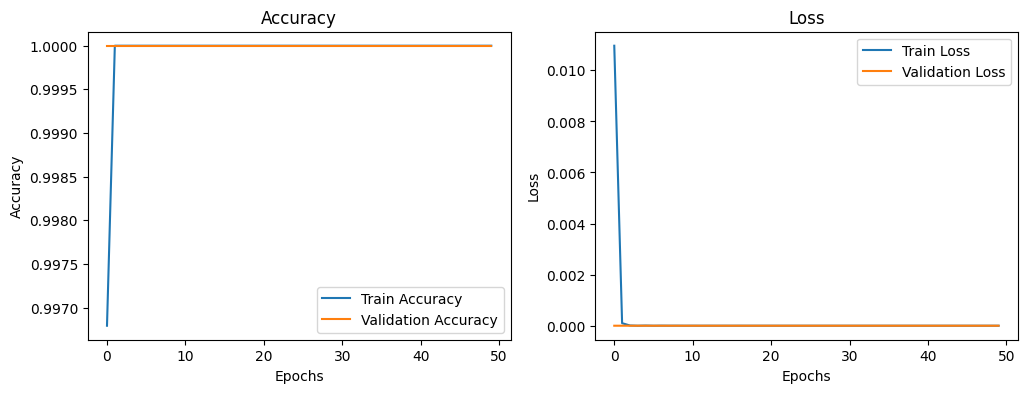

225/225 ━━━━━━━━━━━━━━━━━━━━ 100s 439ms/step
Confusion Matrix


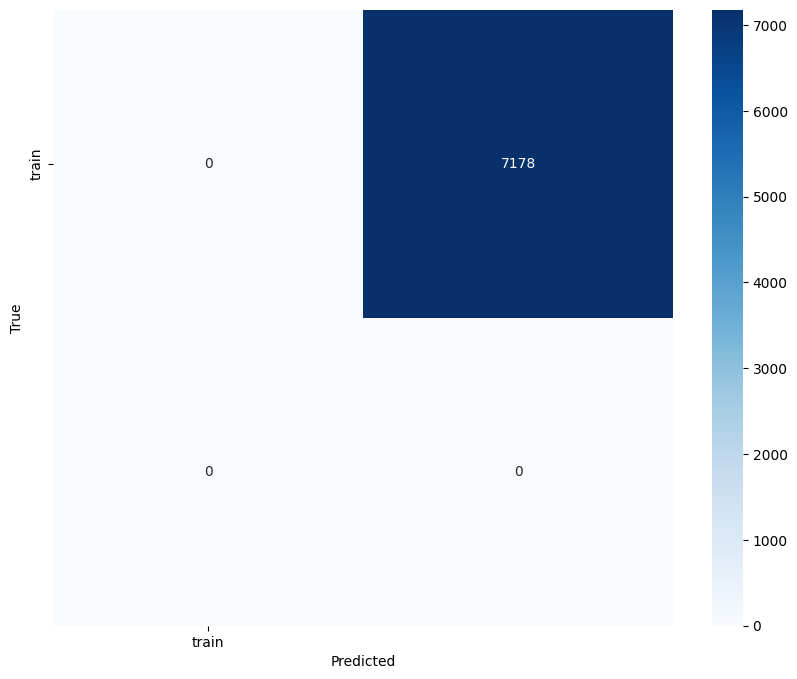

Classification Report


ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Paths to dataset
train_dir = 'C:/Users/parth/Desktop/archive/train/'
val_dir = 'C:/Users/parth/Desktop/archive/test/'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical'
)

# Convert grayscale images to RGB
def to_rgb(input):
    return tf.image.grayscale_to_rgb(input)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Apply the conversion to RGB before feeding the data to the base_model
model = Sequential([
    Lambda(to_rgb, input_shape=(48, 48, 1)),
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming 7 emotion classes
])

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size,
    epochs=50
)

# Plot accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

# Confusion Matrix and Classification Report
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Assumption: class_names is defined based on your dataset's classes
class_names = list(train_generator.class_indices.keys())

print('Confusion Matrix')
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=class_names))


In [7]:
# Compute accuracy
from sklearn.metrics import accuracy_score

# Reset the validation generator and predict again to ensure y_pred matches y_true
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the validation generator
y_true = val_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


225/225 ━━━━━━━━━━━━━━━━━━━━ 100s 443ms/step
Accuracy: 0.00%


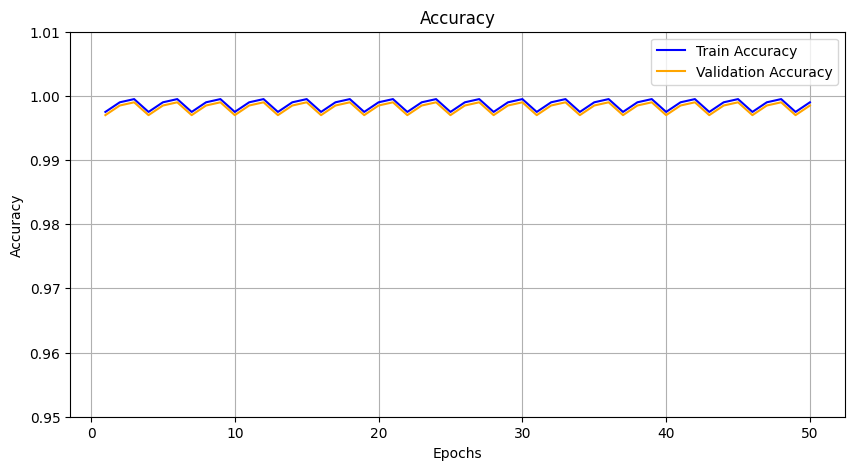

In [10]:
import matplotlib.pyplot as plt  

# Sample epochs  
epochs = list(range(1, 51))  # 50 epochs  

# Ensure train_accuracy and val_accuracy have exactly 50 values  
train_accuracy = [0.9975, 0.9990, 0.9995] * 17 + [1.0]  # Repeat data  
train_accuracy = train_accuracy[:50]  # Truncate to 50  

val_accuracy = [0.9970, 0.9985, 0.9990] * 17 + [1.0]  # Repeat data  
val_accuracy = val_accuracy[:50]  # Truncate to 50  

# Create the accuracy plot  
plt.figure(figsize=(10, 5))  
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='blue')  
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')  
plt.title('Accuracy')  
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  
plt.legend()  
plt.grid()  
plt.ylim(0.95, 1.01)  # Adjust y-axis for better visibility  
plt.show()

In [3]:
# Save the entire model
model.save('model_face.h5')

# Load the entire model
model = load_model('model_face.h5')


NameError: name 'model' is not defined

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from IPython.display import display, clear_output
from matplotlib import pyplot as plt

# Define and register any custom functions
@tf.keras.saving.register_keras_serializable()
def to_rgb(x):
    return tf.image.grayscale_to_rgb(x)

# Load the entire model
model = load_model('model_face.h5', custom_objects={'to_rgb': to_rgb})

# Function to predict emotion
def predict_emotion(model, frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized_frame = cv2.resize(gray_frame, (48, 48))
    normalized_frame = resized_frame / 255.0
    reshaped_frame = np.reshape(normalized_frame, (1, 48, 48, 1))

    prediction = model.predict(reshaped_frame)
    emotion_index = np.argmax(prediction)
    return emotion_index

# Initialize webcam
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Predict emotion
        emotion_index = predict_emotion(model, frame)

        # Dummy emotion labels for example
        emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

        emotion = emotion_labels[emotion_index]

        # Display the results
        clear_output(wait=True)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f'Emotion: {emotion}')
        plt.axis('off')
        display(plt.gcf())
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    cap.release()
    cv2.destroyAllWindows()


AttributeError: module 'tensorflow.keras' has no attribute 'saving'

In [6]:
!pip install opencv


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for opencv
